In [ ]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.datasets as mnist


# loads the MNIST dataset, which is a collection of handwritten digits, and splits it into training and testing datasets

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
def plot_digit(X,y,idx):
  img=X[idx].reshape(28,28)
  plt.imshow(img)
  plt.title('true label : %d' % y[idx])
  plt.show()

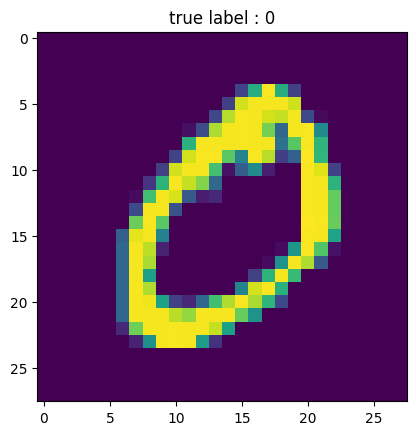

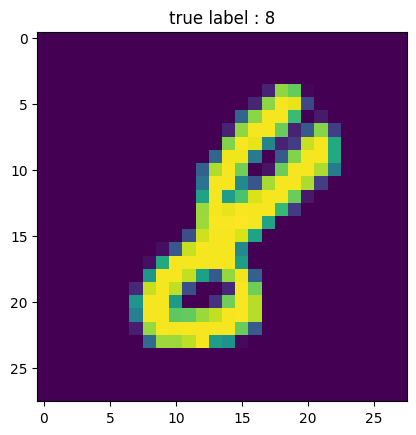

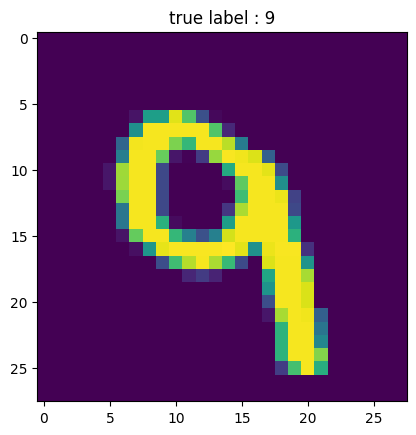

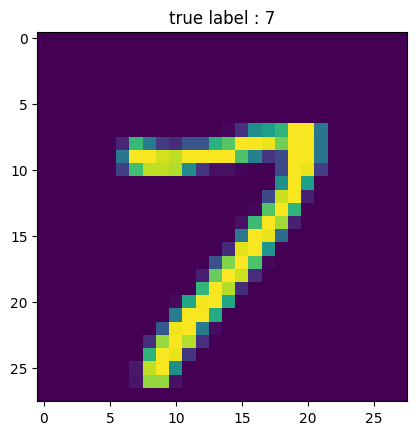

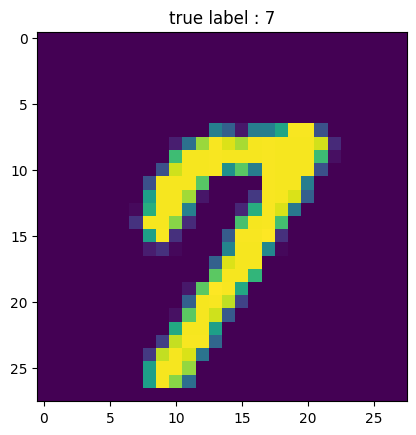

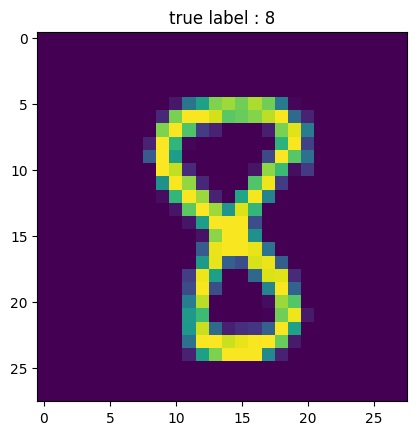

In [ ]:
for i in range(1,60000,10000):
  plot_digit(x_train,y_train,i)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Normalizing the pixel values of the images in the training and testing datasets

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# Create a neural network model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

# Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#  Training the model

In [ ]:
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2661 - accuracy: 0.9215
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1072 - accuracy: 0.9670
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0734 - accuracy: 0.9774
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9822
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0426 - accuracy: 0.9859
Epoch 6/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0314 - accuracy: 0.9898


# Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0941 - accuracy: 0.9748
0.09406138211488724
0.9747999906539917


In [ ]:
model.save('mnist.h5')

1/1 [==============================] - 0s 36ms/step
class: 5


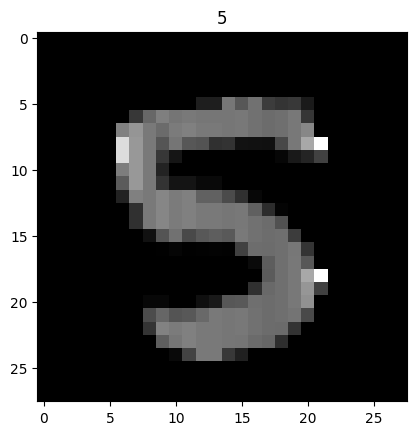

In [ ]:
img = x_test[120]
test_img = img.reshape((1,784))
img_class = model.predict(test_img)
prediction = img_class[0]
classname = np.argmax(prediction)
print("class:", classname)
img = img.reshape((28,28))
plt.title(classname)
plt.imshow(img, cmap='gray')
plt.show()


# Prediction on the test data

1/1 [==============================] - 0s 19ms/step


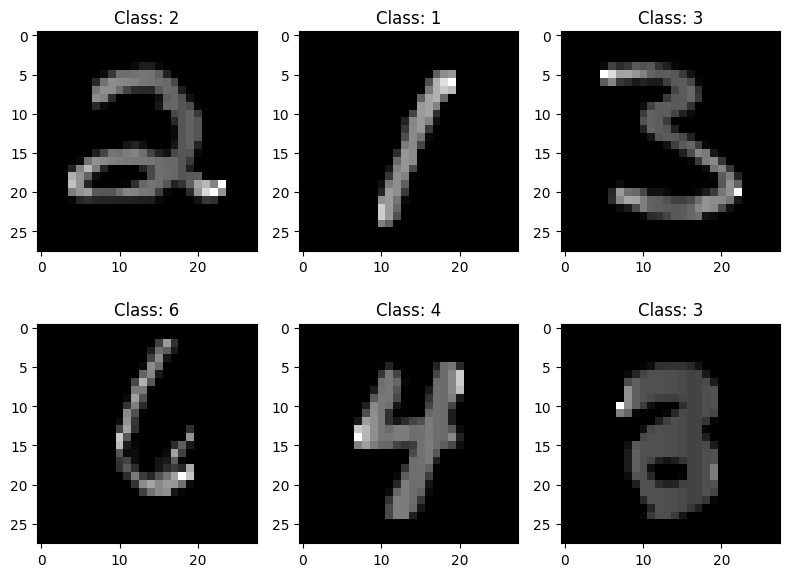

In [ ]:
import random

# Select 6 random indices from x_test
random_indices = random.sample(range(len(x_test)), 6)

# Create a subplot grid with 2 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
axs = axs.flatten()

# Loop through the random indices and plot the corresponding images
for i, idx in enumerate(random_indices):
    img = x_test[idx]
    test_img = img.reshape((1, 784))
    img_class = model.predict(test_img)
    prediction = img_class[0]
    classname = np.argmax(prediction)
    img = img.reshape((28, 28))
    
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f'Class: {classname}')

plt.tight_layout()
plt.show()
